I obtained historical stock data for Meta Platforms Inc. (Stock Ticker: META) from the Yahoo Finance library in Python. For the analysis, I extracted historical stock prices spanning the past year.

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define the ticker symbol for the company you want to fetch data for
ticker_symbol = 'META'  # Example: META Platforms Inc. (META)

# Fetch the stock price data from Yahoo Finance
stock_data = yf.download(ticker_symbol, start='2022-09-28', end='2023-09-28')

[*********************100%%**********************]  1 of 1 completed


In [3]:
stock_data.shape

(251, 6)

In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-09-28 to 2023-09-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [5]:
stock_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

No null values in the dataset

In [6]:
#First 5 rows of the dataset
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-28,134.619995,142.029999,134.270004,141.610001,141.610001,32658500
2022-09-29,139.360001,139.839996,135.199997,136.410004,136.410004,38985400
2022-09-30,136.050003,140.990005,135.500000,135.679993,135.679993,33166400
2022-10-03,137.139999,139.619995,136.100006,138.610001,138.610001,27723100
2022-10-04,140.490005,142.389999,139.339996,140.279999,140.279999,34670700


In [7]:
# Calculate basic statistics for the historical data
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,206.900040,210.368247,204.202351,207.359243,207.359243,3.092355e+07
std,73.567725,74.097155,72.534133,73.249287,73.249287,2.229694e+07
min,90.080002,90.459999,88.089996,88.910004,88.910004,8.629300e+06
25%,132.909996,136.885002,131.579994,133.339996,133.339996,1.941810e+07
50%,204.809998,207.880005,202.820007,206.009995,206.009995,2.542300e+07
75%,284.625000,289.199997,280.389999,285.190002,285.190002,3.449745e+07
max,325.119995,326.200012,317.589996,325.480011,325.480011,2.323166e+08


In [8]:
#Summary statistics for 'Close' variable in the dataset
close_stats=stock_data['Close'].describe()
print(close_stats)

count    251.000000
mean     207.359243
std       73.249287
min       88.910004
25%      133.339996
50%      206.009995
75%      285.190002
max      325.480011
Name: Close, dtype: float64


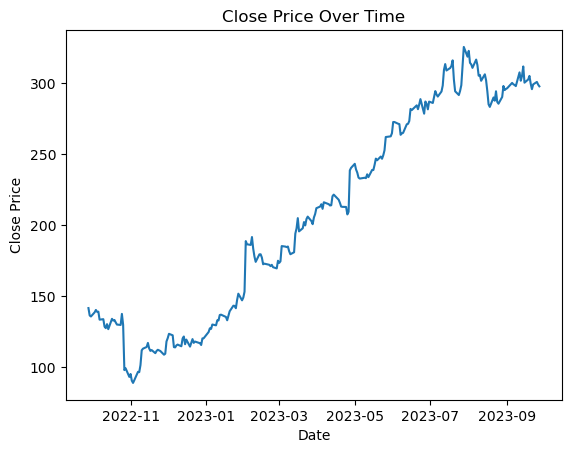

In [9]:
sns.lineplot(x='Date', y='Close', data=stock_data)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.show()

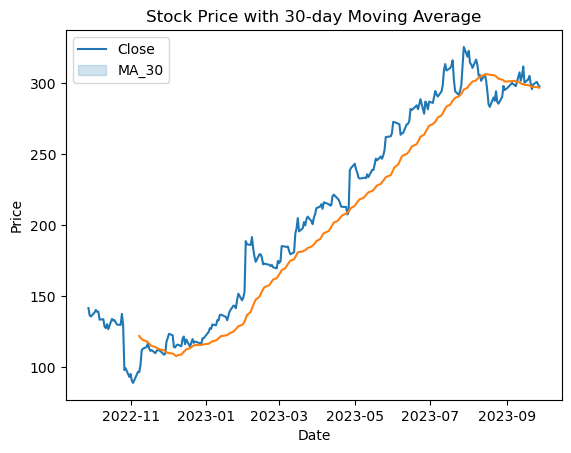

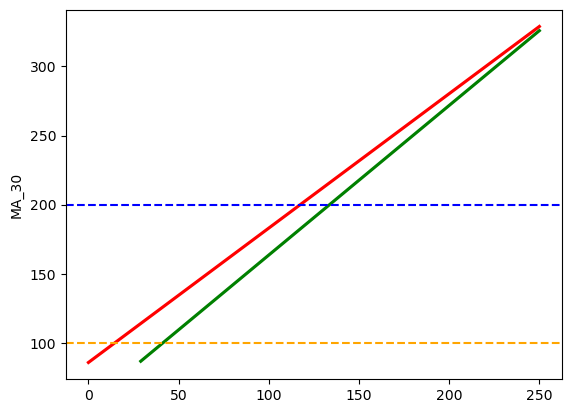

In [10]:
# Data Analysis
stock_data['MA_30'] = stock_data['Close'].rolling(window=30).mean()
sns.lineplot(x=stock_data.index, y='Close', data=stock_data)
sns.lineplot(x=stock_data.index, y='MA_30', data=stock_data)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with 30-day Moving Average')
plt.legend(['Close', 'MA_30'])
plt.show()
# Add trendlines
sns.regplot(x=list(range(len(stock_data))), y='Close', data=stock_data, scatter=False, ci=None, line_kws={'color': 'red'})
sns.regplot(x=list(range(len(stock_data))), y='MA_30', data=stock_data, scatter=False, ci=None, line_kws={'color': 'green'})

# Add support and resistance levels
support_level = 200  # Example support level
resistance_level = 100  # Example resistance level
plt.axhline(y=support_level, color='blue', linestyle='--')
plt.axhline(y=resistance_level, color='orange', linestyle='--')

plt.show()

Insights from line plot:
1)The observed trend indicates that the stock price of META is on the rise over time, a conclusion supported by our plotted data of META's closing price against the time period.
2)Furthermore, the 30-day moving average of the same stock exhibits an upward trajectory. We have added trendlines for both the moving average and closing price to illustrate the stock's movement.
3)To track the movement of the closing price over time, we've introduced a resistance level at 100 dollars per share and a support level at 200 dollars per share.

Average Daily Trading Volume: 30923553.386454184


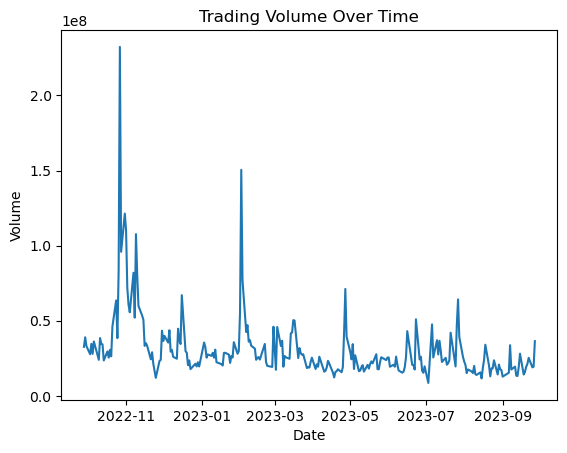

In [11]:
# Calculate the average daily trading volume
avg_volume = stock_data['Volume'].mean()
print('Average Daily Trading Volume:', avg_volume)

# Visualize the trading volume over time
sns.lineplot(x='Date', y='Volume', data=stock_data)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.show()

Insights from Volume Analysis:
1)The average trading volume during this period stood at approximately 31 million shares, a level that is relatively higher when compared to S&P 100 companies.
2)The trajectory of trading volume exhibited a sharp decline during this timeframe, primarily influenced by macroeconomic factors such as a diminishing GDP, rising unemployment rates, and increasing interest rates, all of which negatively impacted investor sentiment.

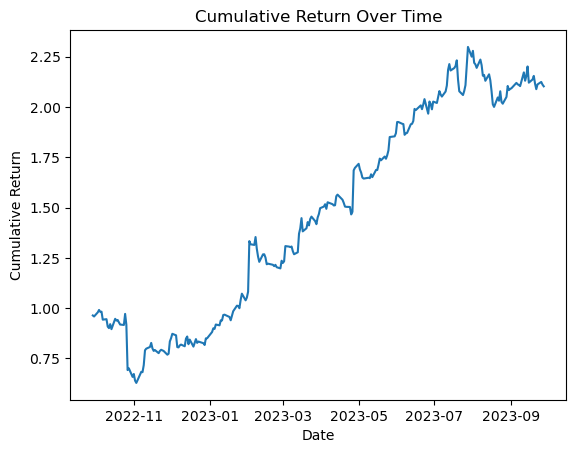

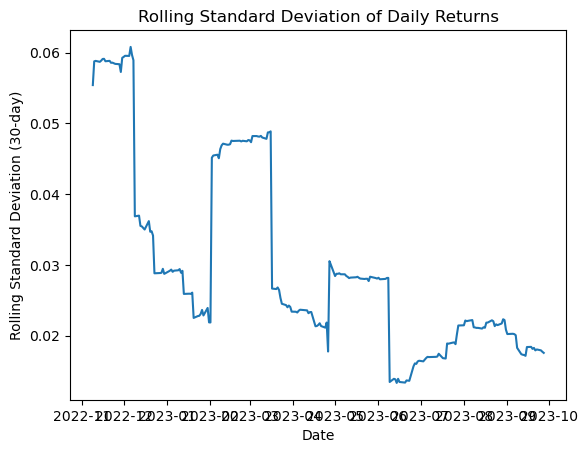

In [12]:
# Calculate daily returns for the stock
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

# Calculate and visualize the cumulative returns of the stock over time
stock_data['Cumulative_Return'] = (1 + stock_data['Daily_Return']).cumprod()
sns.lineplot(x='Date', y='Cumulative_Return', data=stock_data)
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return Over Time')
plt.show()

# Calculate and visualize the rolling standard deviation of the daily returns
stock_data['Rolling_Std'] = stock_data['Daily_Return'].rolling(window=30).std()
sns.lineplot(x='Date', y='Rolling_Std', data=stock_data)
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation (30-day)')
plt.title('Rolling Standard Deviation of Daily Returns')
plt.show()

Insights from Financial metrics:
1)It is evident that the cumulative returns of META stock have exhibited a noticeable upward trend, experiencing substantial growth within this timeframe, ranging from 50% to 225%.
2)Additionally, we note a significant decrease in the standard deviation of the 30-day moving average of META stock's closing price, which presents a favorable signal for investors considering buying this stock.

[*********************100%%**********************]  1 of 1 completed
Correlation: 0.5480116175084346


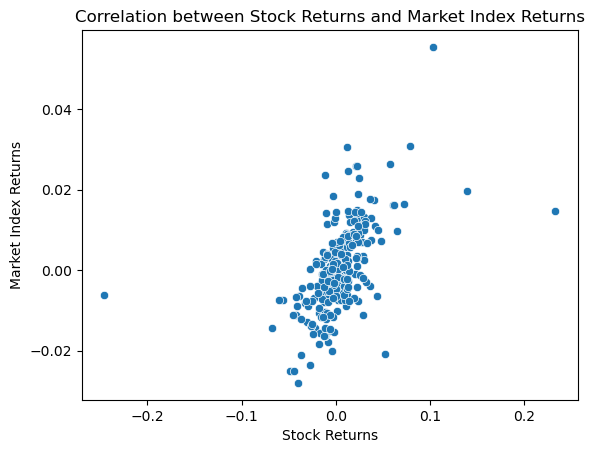

In [13]:
# Correlation Analysis
market_data = yf.download('^GSPC', start='2022-09-28', end='2023-09-28')  # Example: S&P 500 Index (^GSPC)

stock_data['Market_Return'] = market_data['Close'].pct_change()

correlation = stock_data['Daily_Return'].corr(stock_data['Market_Return'])
print('Correlation:', correlation)

sns.scatterplot(x='Daily_Return', y='Market_Return', data=stock_data)
plt.xlabel('Stock Returns')
plt.ylabel('Market Index Returns')
plt.title('Correlation between Stock Returns and Market Index Returns')
plt.show()

Correlation analysis:
1)The correlation value of 0.55 between daily returns and market returns (S&P 500 index) indicates that daily returns generally rise alongside increases in market returns.

Insights from stock analysis of META:
1)Over the past two quarters, META Platforms has seen its revenue increase from 28.64 billion USD to 31.99 billion USD, marking an average quarterly growth of 10.5%.
2)Analyst Andrew Boone from JMP Securities reaffirmed his Buy rating on Meta Platforms and set a price target of 380.00 USD. The company's stock closed at $297.74 last Wednesday, which is close to its 52-week high of 326.20 USD
3)As per TipRanks.com, Boone currently holds a rating of 0 stars on a 0-5 star scale, with an average return of -8.3% and a success rate of 38.7%. Boone primarily focuses on the Technology sector, covering stocks like ODDITY Tech Ltd. Class A, DoubleVerify Holdings, and Fiverr International.
4)Overall, the consensus among analysts is a Strong Buy rating for Meta Platforms, with an average price target of 376.69 USD, indicating a potential upside of 25.4% from the current levels. KeyBanc, in a report dated September 26, also maintained a Buy rating on the stock with a 356.00 USD price target.